### What we often do in this use-case




    High level over-view..
    
   
    Note :->>
    
    We will solve most of those challenges that we often face in real world..
    we will focus primarily on each & every part of data science life-cycle..
    
    
     Life- Cycle of Data Science Project :
        a) Data collection
        b) Perform Data Cleaning / Data Preparation / Data Pre-processing
        c) Data visuaslisation(EDA)
        d) Perform feature engineering
            I)  Feature encoding
            II) checking outliers & impute it..
            III)Feature selection or feature importance
            
        e) build machine leaning model & dump it..
        f) Automate ML Pipeline
        g) hypertune ml model..along with cross validation

    

In [ ]:
'''
In date-time , we have 4 data-types in Pandas :
datetime64[ns] or datetime64[ns, tz]  or datetime64[ns, UTC] or dtype('<M8[ns]')
     means ‘big-endian’  , < is little-endian
     imagine , data represented a single unsigned 4-byte little-endian integer, the dtype string would be <u4..
     (u is type-character code for unsigned integer)

where ,   UTC = Coordinated Universal Time
          ns  = nano second
          tz  = time zone
          M =  M is a character of Data-time , just like int we have i for "Integer" ,


datetime64[ns] is a general dtype, while <M8[ns] is a specific dtype , ns is basicaly nano second..
Both are similar , it entirely how your numpy was compiled..

np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')
## True

'''

'\nIn date-time , we have 4 data-types in Pandas :\ndatetime64[ns] or datetime64[ns, tz]  or datetime64[ns, UTC] or dtype(\'<M8[ns]\')\n     means ‘big-endian’  , < is little-endian\n     imagine , data represented a single unsigned 4-byte little-endian integer, the dtype string would be <u4..\n     (u is type-character code for unsigned integer)\n     \nwhere ,   UTC = Coordinated Universal Time\n          ns  = nano second\n          tz  = time zone\n          M =  M is a character of Data-time , just like int we have i for "Integer" ,\n\n\ndatetime64[ns] is a general dtype, while <M8[ns] is a specific dtype , ns is basicaly nano second..\nBoth are similar , it entirely how your numpy was compiled..\n\nnp.dtype(\'datetime64[ns]\') == np.dtype(\'<M8[ns]\')\n## True\n\n'

In [6]:
from google.colab import drive
drive.mount('/content/drive')
## import necessary packages !
import pandas as pd
pd.set_option("display.max_columns",None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

train_data = pd.read_excel("/content/drive/MyDrive/Hands on Python/Data Science Projects/Data_Train.xlsx")
### getting all the rows where we have missing value
train_data[train_data['Total_Stops'].isnull()]
train_data.dropna(inplace=True)
train_data.dtypes
#train_data.info(memory_usage="deep")

data = train_data.copy()
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

for feature in ['Dep_Time', 'Arrival_Time' , 'Date_of_Journey']:
    change_into_Datetime(feature)

data["Journey_day"] = data['Date_of_Journey'].dt.day
data["Journey_month"] = data['Date_of_Journey'].dt.month
data["Journey_year"] = data['Date_of_Journey'].dt.year
def extract_hour_min(df , col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df
# Departure time is when a plane leaves the gate.
extract_hour_min(data , "Dep_Time")
extract_hour_min(data , "Arrival_Time")
## we have extracted derived attributes from ['Arrival_Time' , "Dep_Time"] , so lets drop both these features ..
cols_to_drop = ['Arrival_Time' , "Dep_Time"]
data.drop(cols_to_drop , axis=1 , inplace=True )

#### Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening.
def flight_dep_time(x):
    '''
    This function takes the flight Departure time
    and convert into appropriate format.
    '''
    if (x>4) and (x<=8):
        return "Early Morning"
    elif (x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return "Noon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return "late night"
#data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar" , color="g")
#### how to make above graph interactive , lets use Cufflinks & plotly to make it interactive !
##!pip install plotly
##!pip install chart_studio
##!pip install cufflinks
## how to use Plotly interactive plots directly with Pandas dataframes, First u need below set-up !
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot , iplot , init_notebook_mode , download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()
## plot is a command of Matplotlib which is more old-school. It creates static charts
## iplot is an interactive plot. Plotly takes Python code and makes beautiful looking JavaScript plots.
#data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind="bar")

#  Lets Apply pre-processing on duration column,
#     -->> Once we pre-processed our Duration feature , lets extract Duration hours and minute from duration..

#     -->> As my ML model is not able to understand this duration as it contains string values ,
#     thats why we have to tell our ML Model that this is hour & this is minute for each of the row ..

def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' +'0m'
    return x

data['Duration'] = data['Duration'].apply(preprocess_duration)
# Now after pre-processing duration feature , still my ml_model is not able to understand duration
# bcz it is string data so any how we have to convert it into numerical(integer of float) values

data['Duration_hours'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))
data['Duration_mins'] = data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))

# Other method to get hours and minutes
# data["Duration_hour"] = pd.to_timedelta(data["Duration"]).dt.components.hours
# data["Duration_minute"] = pd.to_timedelta(data["Duration"]).dt.components.minutes

## convert duration into total minutes duration ..
# '2*60'
# eval('2*60')
# this is how eval() works
data['Duration_total_mins'] = data['Duration'].str.replace('h' ,"*60").str.replace(' ' , '+').str.replace('m' , "*1").apply(eval)
#data["Duration_in_minute"] = data["Duration_hour"]*60 + data["Duration_minute"]
#sns.scatterplot(x="Duration_total_mins" , y="Price" , data=data)

#sns.lmplot(x="Duration_total_mins" , y="Price" , data=data)
### pretty clear that As the duration of minutes increases Flight price also increases.

### lets understand whether total stops affect price or not !
#sns.scatterplot(x="Duration_total_mins" , y="Price" , hue="Total_Stops", data=data)

# '''
# Non stops flights take less duration while their fare is also low, then as the stop increases,
# duration also increases and price also increases(in most of the cases)
# '''

##On which route Jet Airways is extremely used?
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

# Performing Airline vs Price Analysis..
        # ie find price distribution & 5-point summary of each Airline..

#sns.boxplot(y='Price' , x='Airline' , data=data.sort_values('Price' , ascending=False))
#plt.xticks(rotation="vertical")
#plt.show()

# '''
# Conclusion--> From graph we can see that Jet Airways Business have the highest Price.,
#               Apart from the first Airline almost all are having similar median
# '''



#Applying one-hot Encoding on data..

'''

Categorical data refers to a data type that can be stored into groups/categories/labels
Examples of categorical variables are  age group, educational level,blood type etc..


Numerical data refers to the data that is in the form of numbers,
Examples of numerical data are height, weight, age etc..

Numerical data has two categories: discrete data and continuous data


Discrete data : It basically takes countable numbers like 1, 2, 3, 4, 5, and so on.
                In case of infinity, these numbers will keep going on...
                age of a fly : 8 , 9 day etc..

Continuous data : which is continuous in nature
                  amount of sugar , 11.2 kg  , temp of a city  , your bank balance !

For example, salary levels and performance classifications are discrete variables,
whereas height and weight are continuous variables.

'''

cat_col = [col for col in data.columns if data[col].dtype=="object"]
num_col = [col for col in data.columns if data[col].dtype!="object"]

#Handling Categorical Data
'''
    We are using 2 basic Encoding Techniques to convert Categorical data into some numerical format
    Nominal data --> data are not in any order --> OneHotEncoder is used in this case
    Ordinal data --> data are in order -->       LabelEncoder is used in this case

    But in real-world , it is not necessary that u have to always One-hot or label ,
    hence we will discuss more interesting approaches in upcoming sessions to do this !'''

'''But in real-world , it is not necessary that u have to always One-hot or label ,
hence we will discuss more interesting approaches in upcoming sessions to do this !'''



### Applying One-hot from scratch :
data['Source'].unique()
#data['Source'].apply(lambda x : 1 if x=='Banglore' else 0)
for sub_category in data['Source'].unique():
    data['Source_'+sub_category] = data['Source'].apply(lambda x : 1 if x==sub_category else 0)

## Lets Perform target guided encoding on Data
'''
ofcourse we can use One-hot , but if we have more sub-categories , it creates curse of dimensionality
    lets use Target Guided Mean Encoding in such case to get rid of curse of dimensionality..
    '''
'''

Now on 2 features , Airline & Destination , we can apply on-hot as there is no such order
but total_stops is my ordinal data , it makes no sense if we apply on-hot on top of this..
similarly if we have any feature which have more categories , it is not good to apply one-hot as it will create
curse of dimensionality issue , which leads to usage of more resources of your pc..

So we can think for appplying mean Encoding or better techniques like Target Guided Ordinal Encoding !


'''

airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index
dict_airlines = {key:index for index , key in enumerate(airlines , 0)}
data['Airline'] = data['Airline'].map(dict_airlines)

data['Destination'].replace('New Delhi' , 'Delhi' , inplace=True)
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index
dict_dest = {key:index for index , key in enumerate(dest , 0)}
data['Destination'] = data['Destination'].map(dict_dest)


stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
data['Total_Stops'] = data['Total_Stops'].map(stop)


'''

lets drop Date_of_Journey as well as we have already extracted "Journey_hour" , "jpuney_month" , Journey_day"..
Additional_Info contains almost 80% no_info , so we can drop this column ..
lets drop Duration_total_mins as we have already extracted "Duration_hours" & "Duration_mins"
Lets drop "Source" feature as well as we have already perform feature encoding on this Feature
lets drop Journey_year as well , as it has constant values throughtout dataframe which is 2019..

'''

data.drop(columns=['Date_of_Journey' , 'Additional_Info' , 'Duration_total_mins' , 'Source' , 'Journey_year'] , axis=1 , inplace=True)

data.drop(columns=['Duration'] , axis=1 , inplace=True)

## we can drop "Duration" feature as we have extracted "Duration hour" & "Duration Minute"..

def plot(df, col):
    fig , (ax1 , ax2 , ax3) = plt.subplots(3,1)

    sns.distplot(df[col] , ax=ax1)
    sns.boxplot(df[col] , ax=ax2)
    sns.distplot(df[col] , ax=ax3 , kde=False)

#plot(data , 'Price')
#Outlier
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3- q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

### wherever I have price >35K just replace replace it with median of Price

data['Price'] = np.where(data['Price']>=35000 , data['Price'].median() , data['Price'])


Mounted at /content/drive


###

In [ ]:
'''
    : Feature Selection
    Finding out the best feature which will contribute and have good relation with target variable.


    Q-> Why to apply Feature Selection?
    To select important features ie to get rid of curse of dimensionality ie..or to get rid of duplicate features

'''

In [ ]:
data.head(1)

,Airline,Destination,Route,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,BLR → DEL,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0


In [7]:
from sklearn.feature_selection import mutual_info_regression
X = data.drop(['Price','Route'] , axis=1)
y = data['Price']

'''
Estimate mutual information for a continuous target variable.

Mutual information between two random variables is a non-negative
value, which measures the dependency between the variables.
If It is equal to zero it means two random variables are independent, and higher
values mean higher dependency.
'''
imp = mutual_info_regression(X , y)

imp_df = pd.DataFrame(imp , index=X.columns)
imp_df.columns = ['importance']
imp_df.sort_values(by='importance' , ascending=False)

'''
#### what we often do in modelling:

    a..Initially ,lets build basic random model.
    b..then later-on , we will try to improve this model using some parameters..
    c..Then we will try to improve it..
    d..Then we will hyper-tune my model to get optimal value of parameters in order to achieve optimal value of params..
'''

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.25, random_state=42)

from sklearn.ensemble import RandomForestRegressor
ml_model = RandomForestRegressor()
ml_model.fit(X_train , y_train)


y_pred = ml_model.predict(X_test)

from sklearn import metrics
metrics.r2_score(y_test , y_pred)


0.8083976328584492

#### lets try to dump ml model using pickle or joblib..
    advantage of dumping--
    imagine in future we have new data & lets say we have to predict price on this huge data

    then to do prediction on this new data , we can use this pre-trained model what we have dumped..


In [9]:
import pickle

# open a file, where you want to store the data
file = open(r"/content/drive/MyDrive/Hands on Python/Data Science Projects/rf_random.pkl" , 'wb')
# dump information to that file
pickle.dump(ml_model , file)

model = open(r"/content/drive/MyDrive/Hands on Python/Data Science Projects/rf_random.pkl" , 'rb')

forest = pickle.load(model)
y_pred2 = forest.predict(X_test)
metrics.r2_score(y_test , y_pred2)


0.8083976328584492

In [10]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [11]:
mape(y_test , y_pred)

13.205989270668308

### b.. How to automate ml pipeline !

In [ ]:
'''

    Lets automate all the stuffs..
    let say ,I will just pass ml algo & i get several results like--

    Training score, predictions, r2_score, mse, mae, rmse, mape,distribution of error


'''

In [13]:
from sklearn import metrics
def predict(ml_model):
    model = ml_model.fit(X_train , y_train)
    print('Training score : {}'.format(model.score(X_train , y_train)))
    y_predection = model.predict(X_test)
    print('predictions are : {}'.format(y_predection))
    print('\n')
    r2_score = metrics.r2_score(y_test , y_predection)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test , y_predection)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test , y_predection)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test , y_predection))))
    print('MAPE : {}'.format(mape(y_test , y_predection)))
    sns.distplot(y_test - y_predection)

Training score : 0.9516873267586226
predictions are : [16705.75  6232.21  8800.85 ...  3531.22  6305.52  6891.64]


r2 score : 0.8058984071548269
MAE : 1183.8203965345463
MSE : 3778692.1039321497
RMSE : 1943.8858258478429
MAPE : 13.223562175141737


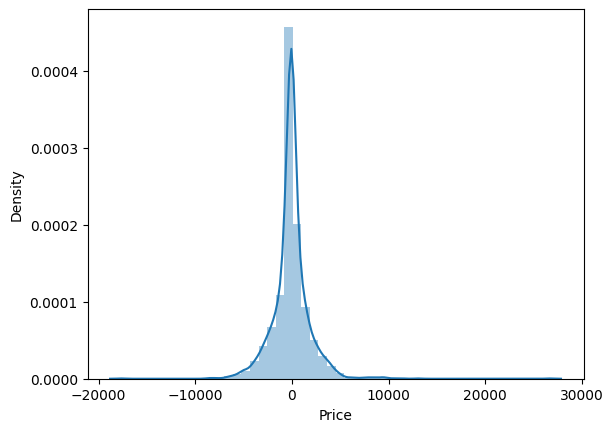

In [14]:
predict(RandomForestRegressor())

In [15]:
from sklearn.tree import DecisionTreeRegressor

predict(DecisionTreeRegressor())

Training score : 0.966591628243878
predictions are : [16840.  6976.  8085. ...  3419.  5797.  6818.]


r2 score : 0.6952855787596899
MAE : 1369.6249220017473
MSE : 5932058.3649896
RMSE : 2435.5817303037893
MAPE : 15.106628438284842


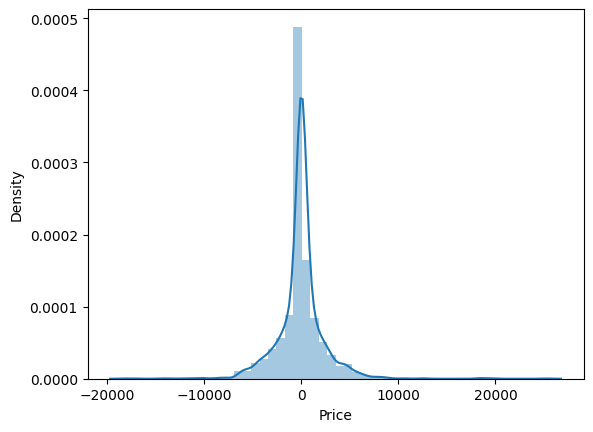

In [ ]:
## how to select which ML algo we should apply for
## ans is use Multiple Algos,then go for Hyper-parameter Optimization,then for Cross Validation then go for various metrics
## & based on domain expertise knowledge Then I can say ya this model perfoms best

### Hyperparameter Tuning or Hyperparameter Optimization
    1.Choose following method for hyperparameter tuning
        a.RandomizedSearchCV --> Fast way to Hypertune model
        b.GridSearchCV--> Slower way to hypertune my model
    2.Choose ML algo that u have to hypertune
    2.Assign hyperparameters in form of dictionary or create hyper-parameter space
    3.define searching &  apply searching on Training data or  Fit the CV model
    4.Check best parameters and best score

In [17]:
from sklearn.model_selection import RandomizedSearchCV
### initialise your estimator
reg_rf = RandomForestRegressor()

np.linspace(start =100 , stop=1200 , num=6)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100 , stop=1200 , num=6)]

# Number of features to consider at every split
max_features = ["auto", "sqrt"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start =5 , stop=30 , num=4)]

# Minimum number of samples required to split a node
min_samples_split = [5,10,15,100]


# Create the random grid or hyper-parameter space

random_grid = {
    'n_estimators' : n_estimators ,
    'max_features' : max_features ,
    'max_depth' : max_depth ,
    'min_samples_split' : min_samples_split
}



## Define searching

# Random search of parameters, using 3 fold cross validation
# search across 576 different combinations


rf_random = RandomizedSearchCV(estimator=reg_rf , param_distributions=random_grid , cv=3 , n_jobs=-1 , verbose=2)

rf_random.fit(X_train , y_train)

rf_random.best_params_

#### In your case , may be your parameters may vary a little bit , thats not a major issue..
rf_random.best_estimator_

rf_random.best_score_

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [22]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}